In [13]:
#Llamar al dataloader
%run DataLoader.ipynb

In [14]:
!pip install wordcloud

In [15]:
from wordcloud import WordCloud

In [16]:
# extrae los hashtags de un texto y devuelve una lista 
def hashtags(text):
    result = []
    for token in text.split():
        if token[0]=='#':
            result.append(token.replace('#', '').lower())
    return result    

text = 'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'
hashtags(text)

['earthquake']

In [17]:
dataset['hashtags'] = dataset.text.apply(lambda x : hashtags(x))
dataset.head(5)

,keyword,location,text,target,longitud,hashtags
id,,,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,True,69,[earthquake]
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,True,38,[]
5,NaN,NaN,All residents asked to 'shelter in place' are ...,True,133,[]
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",True,65,[wildfires]
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True,88,"[alaska, wildfires]"


In [18]:
# cantidad de registros que tienen hashtags
hashtags_count = dataset['hashtags'].apply(lambda x : len(x)!= 0).value_counts().reset_index()
hashtags_count.columns = ['Tipo', 'Cantidad']
hashtags_count.Tipo = ['Tweets sin hashtags', 'Tweets con hashtags']
hashtags_count

,Tipo,Cantidad
0,Tweets sin hashtags,5879
1,Tweets con hashtags,1734


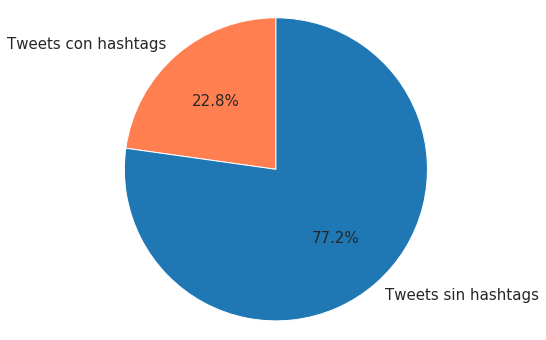

In [19]:
tweets_contains_hashtags = dataset['hashtags'].apply(lambda x : len(x)!= 0).reset_index()
tweets_with_hashtags = tweets_contains_hashtags.loc[tweets_contains_hashtags['hashtags'],'hashtags'].count()
tweets_without_hashtags = tweets_contains_hashtags.loc[tweets_contains_hashtags['hashtags']==False,'hashtags'].count()

labels = 'Tweets con hashtags', 'Tweets sin hashtags'
sizes = [tweets_with_hashtags, tweets_without_hashtags]
colors = ('coral','#1f77b4' )

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, textprops={'fontsize': 15}, colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [20]:
df_hashtags = dataset.explode('hashtags')
df_hashtags.head(10)

,keyword,location,text,target,longitud,hashtags
id,,,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,True,69,earthquake
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,True,38,NaN
5,NaN,NaN,All residents asked to 'shelter in place' are ...,True,133,NaN
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",True,65,wildfires
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True,88,alaska
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True,88,wildfires
8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,True,110,rockyfire
8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,True,110,cafire
8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,True,110,wildfires


In [21]:
#veo cantidad de nulos
df_hashtags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9219 entries, 1 to 10873
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   9138 non-null   object
 1   location  6080 non-null   object
 2   text      9219 non-null   object
 3   target    9219 non-null   bool  
 4   longitud  9219 non-null   int64 
 5   hashtags  3340 non-null   object
dtypes: bool(1), int64(1), object(4)
memory usage: 441.1+ KB


In [22]:
top_hashtags = df_hashtags.hashtags.value_counts().reset_index()
top_hashtags.columns = ['hashtags','Cantidad']
top_hashtags.head()

,hashtags,Cantidad
0,news,72
1,best,30
2,prebreak,30
3,hot,30
4,???,23


In [23]:
top_hashtags.describe()


,Cantidad
count,1963.000000
mean,1.701477
std,2.628072
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,72.000000


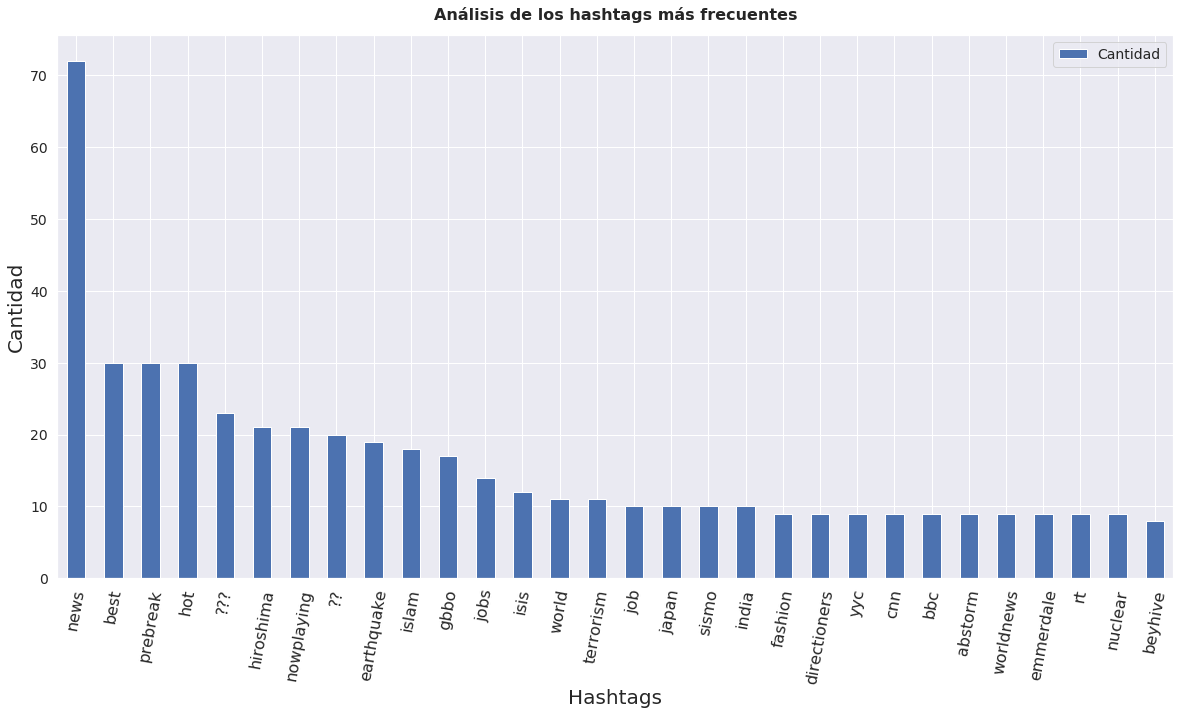

In [24]:

fig, ax = plt.subplots()


top_hashtags.nlargest(30,'Cantidad').plot(kind = 'bar', x='hashtags',y='Cantidad', ax = ax)

plt.xlabel("Hashtags",fontsize=20)
plt.ylabel('Cantidad',fontsize=20)
plt.xticks(fontsize=16,rotation = 80) 
plt.title('Análisis de los hashtags más frecuentes',fontsize=16,fontweight='bold', pad = 15)



plt.show()

{'hashtags': 0                     news
 1                     best
 2                 prebreak
 3                      hot
 4                      ???
                ...        
 1958      bantrophyhunting
 1959    twisterlovesshania
 1960               skywarn
 1961    infectiousdiseases
 1962            reggaeboyz
 Name: hashtags, Length: 1963, dtype: object,
 'Cantidad': 0       72
 1       30
 2       30
 3       30
 4       23
         ..
 1958     1
 1959     1
 1960     1
 1961     1
 1962     1
 Name: Cantidad, Length: 1963, dtype: int64}

In [60]:
values = top_hashtags.set_index('hashtags').T.to_dict('records')[0]
values

{'news': 72,
 'best': 30,
 'prebreak': 30,
 'hot': 30,
 '???': 23,
 'hiroshima': 21,
 'nowplaying': 21,
 '??': 20,
 'earthquake': 19,
 'islam': 18,
 'gbbo': 17,
 'jobs': 14,
 'isis': 12,
 'world': 11,
 'terrorism': 11,
 'job': 10,
 'japan': 10,
 'sismo': 10,
 'india': 10,
 'fashion': 9,
 'directioners': 9,
 'yyc': 9,
 'cnn': 9,
 'bbc': 9,
 'abstorm': 9,
 'worldnews': 9,
 'emmerdale': 9,
 'rt': 9,
 'nuclear': 9,
 'beyhive': 8,
 'edm': 8,
 'irandeal': 8,
 'dnb': 8,
 'handbag': 8,
 'nursing': 8,
 'wildfire': 8,
 'quran': 7,
 'hiring': 7,
 'ices\x89û_': 7,
 'dubstep': 7,
 'seattle': 7,
 'okwx': 7,
 'animalrescue': 7,
 'lies': 7,
 'god': 7,
 'truth': 7,
 'fukushima': 7,
 'business': 7,
 'trapmusic': 7,
 'wx': 7,
 'tcot': 7,
 'dance': 7,
 '': 7,
 'military': 6,
 'bestnaijamade:': 6,
 'mtvhottest': 6,
 'prophetmuhammad': 6,
 'africa': 6,
 'kindle': 6,
 '\x89û_': 6,
 'tech': 6,
 'art': 6,
 'wmata': 6,
 'course': 6,
 'rohingya': 6,
 'us': 6,
 'drought': 6,
 'womens': 6,
 'disaster': 6,
 'breaki

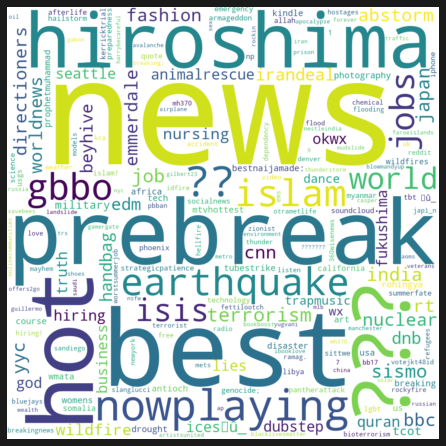

In [64]:
wordcloud = WordCloud(
    width = 1000,
    height = 1000,
    background_color = 'white').generate_from_frequencies(values)
fig = plt.figure(
    figsize = (6, 6),
    facecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()